
## Image Registration using Enhanced Correlation Coefficient (ECC) Maximization

Using an actual rotation and original image (along with histogram normalization). 

In [3]:
import numpy as np
import cv2
from skimage.external import tifffile as tiff
from skimage.util import img_as_float
from skimage import exposure
from skimage.filters import try_all_threshold, threshold_li
from skimage.transform import rescale
from skimage.transform import warp, AffineTransform, resize
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline


0.0 1.0
0.0 1.0


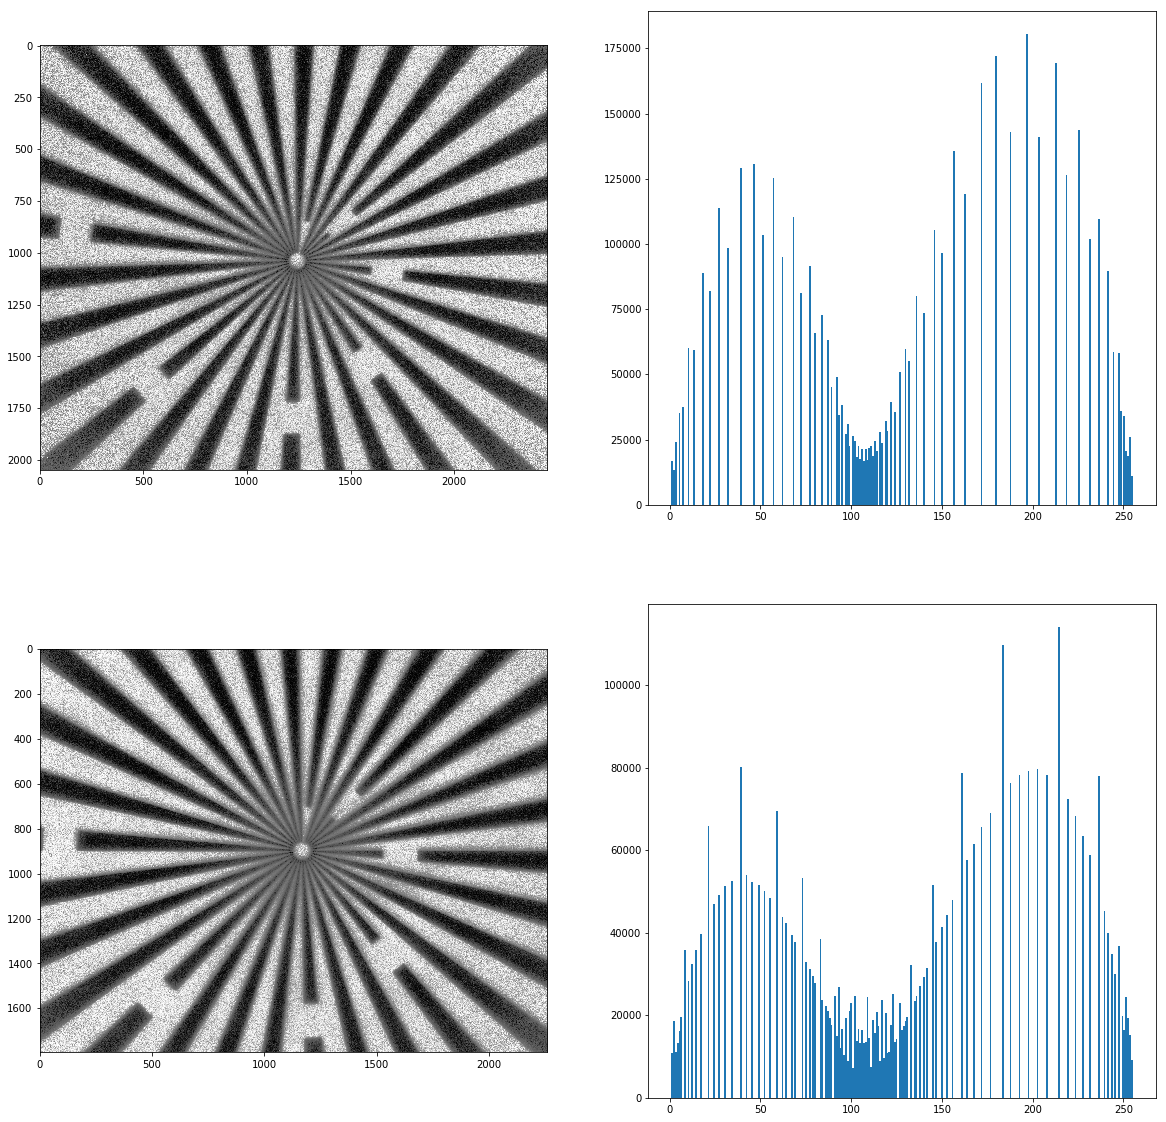

In [11]:
samples = ['./samples/rot_0.tif', 
           './samples/rot_180.tif',
           './samples/faked_rot_0_tilted_5.3deg.tif',
           './samples/faked_rot_180.tif']

img0deg = img_as_float(tiff.imread(samples[0]))
img1deg = img_as_float(tiff.imread(samples[2]))
img1deg = cv2.flip(img1deg, 1)

img0deg = rescale_intensity(img0deg)
img1deg = rescale_intensity(img1deg)

print (np.min(img0deg), np.max(img0deg))
print (np.min(img1deg), np.max(img1deg))

img0deg = img0deg * 255.0
img0deg = img0deg.astype(np.uint8)

img1deg =img1deg * 255.0
img1deg = img1deg.astype(np.uint8) 


img0deg = cv2.equalizeHist(img0deg)
img1deg = cv2.equalizeHist(img1deg)


f, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0, 0].imshow(img0deg, cmap='gray')
ax[0, 1].hist(img0deg.ravel(), 255, [1, 255])
ax[1, 0].imshow(img1deg, cmap='gray')
ax[1, 1].hist(img1deg.ravel(), 255, [1, 255])

plt.show()


In [12]:
def preProcess(image, rs=0.3):
    tmp = rescale(image, rs, mode='reflect')
    thresh = threshold_li(tmp)
    binary = tmp > thresh
    result = np.zeros_like(binary, dtype=np.uint8)
    result[~binary] = 255
    
    return result

def computeRotation(img0, img1):
    sz = img0.shape
    warp_mode = cv2.MOTION_AFFINE

    warp_matrix = np.eye(2, 3, dtype=np.float32)

    number_of_iterations = 5000
    termination_eps = 1e-10

    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (img0, img1, warp_matrix, warp_mode, criteria)

    sin = warp_matrix[0, 1]
    cos = warp_matrix[0, 0]
    
    degs = np.arctan2(sin, cos) * 180.0 / np.pi
    
    return degs

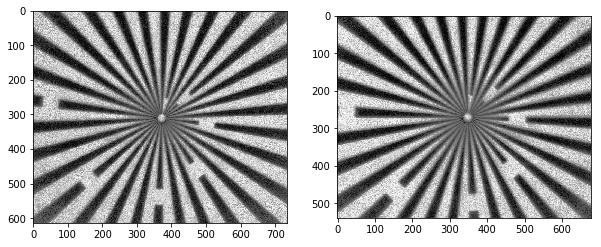

In [13]:
img0 = rescale(img0deg, 0.3, mode='reflect')
img1 = rescale(img53deg, 0.3, mode='reflect')

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img0, cmap='gray')
ax[1].imshow(img1, cmap='gray')

plt.show()

In [14]:
img0 = img0.astype(np.float32)
img1 = img1.astype(np.float32)

print (computeRotation(img1, img0))

-0.903413967035
